In [135]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

/var/folders/78/d522403173q4zxk8jd8f3hz80000gn/T/ipykernel_1431/1424163639.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# The Hipparcos Survey

Hipparcos, or the High Precision Parallax Collecting Satellite, and also a play on the name of the ancient Greek astronomer Hipparcus, was a mission by the European Space Agency with the goal of mapping the motion, brightness, and parallax of more than a hundred thousand stars. The satellite launched in 1989, and for 4 years analyzed the 118’000-something predefined objects. The majority of the stars to be observed were selected based on their apparent magnitude — practically all stars potentially visible to the naked eye were included in that input list.

The columns are separated by the | character, and most relevant data appears to be in its own column. The exception here is the position of the star, which is given by two values (right ascension, or RAdeg, and declination, or DEdeg, both measured in degrees) in a single column.

We begin by reading the input data as a CSV file. We specify the delimiter to be |, skip the first 11 and the last row, and tell pandas to ignore the header.

Next, we want the parser to only care about specific coloumns by specifying the list of columns passed to the 'usecols = []' argument and the list of labels passed to the 'names = []' argument.

In [136]:
data = pd.read_csv('data.txt', delimiter='|', engine='python',
                       skiprows=11,
                       skipfooter=1,
                       index_col=0,
                       header=0,
                       usecols=[1, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16],
                       names=['index', 'magnitude', 'raw position', 'parallax',
                              'proper motion alpha', 'proper motion delta',
                              'error alpha', 'error delta', 'error parallax',
                              'error motion alpha', 'error motion delta'])

data # show data

,magnitude,raw position,parallax,proper motion alpha,proper motion delta,error alpha,error delta,error parallax,error motion alpha,error motion delta
index,,,,,,,,,,
1,9.10,000.00091185 +01.08901332,3.54,-5.20,-1.88,1.32,0.74,1.39,1.36,0.81
2,9.27,000.00379737 -19.49883745,21.90,181.21,-0.93,1.28,0.70,3.10,1.74,0.92
3,6.61,000.00500795 +38.85928608,2.81,5.24,-2.91,0.53,0.40,0.63,0.57,0.47
4,8.06,000.00838170 -51.89354612,7.75,62.85,0.16,0.53,0.59,0.97,0.65,0.65
5,8.55,000.00996534 -40.59122440,2.87,2.53,9.07,0.64,0.61,1.11,0.67,0.74
...,...,...,...,...,...,...,...,...,...,...
118318,6.99,359.96374383 +11.67370866,1.92,-2.16,2.09,0.78,0.50,0.91,0.88,0.60
118319,8.23,359.97391252 -22.42818030,10.63,148.74,27.53,0.97,0.58,1.17,1.10,0.52
118320,7.59,359.97605747 +05.95663786,5.00,20.92,-35.26,0.95,0.53,1.01,0.89,0.54


Now that the data is in, we need to take care of a few issues. First, the position of each star is determined by two numbers in the same column. We need to take the 'raw position' column and apply the ***string split*** function to each entry. We specify 'expand=True' in order to split the original column into several new ones. The values are to be interpreted as floating point numbers (instead of strings). Finally, we drop the original column.

In [137]:
data[['alpha', 'delta']] = data['raw position'].str.split(expand=True).astype(float)
data.drop('raw position', axis=1, inplace=True)
data.dropna(inplace=True) # remove rows with NaN values (data missing)
data

,magnitude,parallax,proper motion alpha,proper motion delta,error alpha,error delta,error parallax,error motion alpha,error motion delta,alpha,delta
index,,,,,,,,,,,
1,9.10,3.54,-5.20,-1.88,1.32,0.74,1.39,1.36,0.81,0.000912,1.089013
2,9.27,21.90,181.21,-0.93,1.28,0.70,3.10,1.74,0.92,0.003797,-19.498837
3,6.61,2.81,5.24,-2.91,0.53,0.40,0.63,0.57,0.47,0.005008,38.859286
4,8.06,7.75,62.85,0.16,0.53,0.59,0.97,0.65,0.65,0.008382,-51.893546
5,8.55,2.87,2.53,9.07,0.64,0.61,1.11,0.67,0.74,0.009965,-40.591224
...,...,...,...,...,...,...,...,...,...,...,...
118318,6.99,1.92,-2.16,2.09,0.78,0.50,0.91,0.88,0.60,359.963744,11.673709
118319,8.23,10.63,148.74,27.53,0.97,0.58,1.17,1.10,0.52,359.973913,-22.428180
118320,7.59,5.00,20.92,-35.26,0.95,0.53,1.01,0.89,0.54,359.976057,5.956638


In [138]:
data.dtypes # show data types

magnitude               object
parallax                object
proper motion alpha     object
proper motion delta     object
error alpha             object
error delta             object
error parallax          object
error motion alpha      object
error motion delta      object
alpha                  float64
delta                  float64
dtype: object

We want to convert all columns to floats:

In [139]:
data = data.astype(float)

Next, we convert all input provided in miliarcseconds (mas) to degrees by dividing the relevant columns by a factor of 1000 (to go from miliarcseconds to arcseconds) and then by another factor of 3600 (to go from arcseconds to degrees).

In [140]:
relevant_columns = ['parallax','proper motion alpha', 'proper motion delta', 'error alpha', 'error delta',
                    'error parallax', 'error motion alpha', 'error motion delta']

# divide all miliarcsecond values by 3600 and 1000 to conver to to degrees
for column in relevant_columns:
    data[column] = data[column] / (3600 * 1000)

data

,magnitude,parallax,proper motion alpha,proper motion delta,error alpha,error delta,error parallax,error motion alpha,error motion delta,alpha,delta
index,,,,,,,,,,,
1,9.10,9.833333e-07,-1.444444e-06,-5.222222e-07,3.666667e-07,2.055556e-07,3.861111e-07,3.777778e-07,2.250000e-07,0.000912,1.089013
2,9.27,6.083333e-06,5.033611e-05,-2.583333e-07,3.555556e-07,1.944444e-07,8.611111e-07,4.833333e-07,2.555556e-07,0.003797,-19.498837
3,6.61,7.805556e-07,1.455556e-06,-8.083333e-07,1.472222e-07,1.111111e-07,1.750000e-07,1.583333e-07,1.305556e-07,0.005008,38.859286
4,8.06,2.152778e-06,1.745833e-05,4.444444e-08,1.472222e-07,1.638889e-07,2.694444e-07,1.805556e-07,1.805556e-07,0.008382,-51.893546
5,8.55,7.972222e-07,7.027778e-07,2.519444e-06,1.777778e-07,1.694444e-07,3.083333e-07,1.861111e-07,2.055556e-07,0.009965,-40.591224
...,...,...,...,...,...,...,...,...,...,...,...
118318,6.99,5.333333e-07,-6.000000e-07,5.805556e-07,2.166667e-07,1.388889e-07,2.527778e-07,2.444444e-07,1.666667e-07,359.963744,11.673709
118319,8.23,2.952778e-06,4.131667e-05,7.647222e-06,2.694444e-07,1.611111e-07,3.250000e-07,3.055556e-07,1.444444e-07,359.973913,-22.428180
118320,7.59,1.388889e-06,5.811111e-06,-9.794444e-06,2.638889e-07,1.472222e-07,2.805556e-07,2.472222e-07,1.500000e-07,359.976057,5.956638


Now that all data entries are of the correct type and have consistent units, we can visually check out the catalogue by looking at some plots:

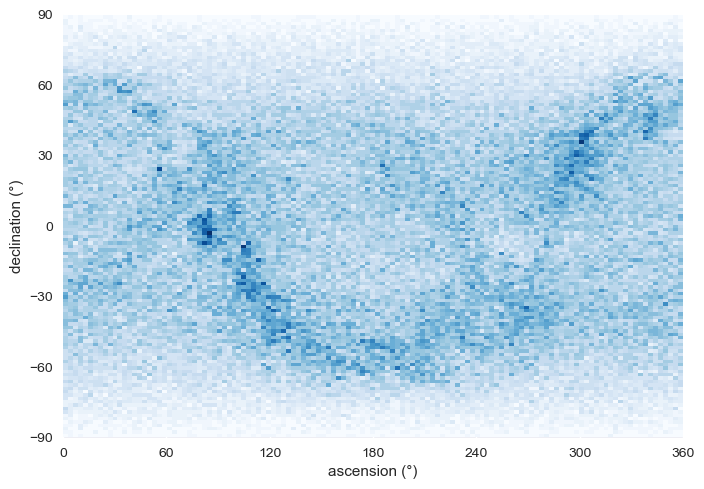

In [141]:
plt.hist2d(data['alpha'], data['delta'], bins=125, cmap='Blues')
plt.xlabel('ascension (°)')
plt.ylabel('declination (°)')
plt.xticks([0, 60, 120, 180, 240, 300, 360])
plt.yticks([-90, -60, -30, 0, 30, 60, 90])
plt.show()

Interestingly, the stars are not distributed uniformly across the sky. First of all, it is important to realize that the position of stars in the sky is given by two coordinates: right ascension and declination. These are spherical angular coordinates, and thus can not be straightforwardly mapped to a rectangular plot. Hence, the star density in the very north and south (top and bottom, respectively) seems to be lower — but this is just an artifact of the coordinate system used. What is more interesting are the two ‘snakes’ of higher density weaving their way through their plot. The ‘U’ shaped one corresponds, presumably, to the Milky Way, the sideways projection of our Galaxy that appears as a bright band of stars stretching across the night sky. As the Earth’s rotation axis (defining the North and the South poles) is not perpendicular to the Galactic disc, the straight band is warped into a wavy pattern in a ‘geocentric’ coordinate system. However, it is not clear to me what the less apparent ‘$\Omega$‘ shape corresponds to.

## Distances

The distance $d$ (in AU) of a star can then be obtained from the parallax $p$ simply as:
$$
d = \tan^{-1}\left(p\right)
$$

In [142]:
from IPython.display import Image
img = 'parallax.png'
Image(url=img)

We convert the degrees into radians, then multiply by a conversion factor leading to a distance measured in lightyears. We just need to be careful about negative parallaxes, which are, as the program supervisors note, a consequence of measurement errors

In [143]:
data['distance'] = 1.58125e-5 / np.tan(np.pi / 180.0 * data.loc[data['parallax'] > 0]['parallax'])
data

,magnitude,parallax,proper motion alpha,proper motion delta,error alpha,error delta,error parallax,error motion alpha,error motion delta,alpha,delta,distance
index,,,,,,,,,,,,
1,9.10,9.833333e-07,-1.444444e-06,-5.222222e-07,3.666667e-07,2.055556e-07,3.861111e-07,3.777778e-07,2.250000e-07,0.000912,1.089013,921.345268
2,9.27,6.083333e-06,5.033611e-05,-2.583333e-07,3.555556e-07,1.944444e-07,8.611111e-07,4.833333e-07,2.555556e-07,0.003797,-19.498837,148.929783
3,6.61,7.805556e-07,1.455556e-06,-8.083333e-07,1.472222e-07,1.111111e-07,1.750000e-07,1.583333e-07,1.305556e-07,0.005008,38.859286,1160.698309
4,8.06,2.152778e-06,1.745833e-05,4.444444e-08,1.472222e-07,1.638889e-07,2.694444e-07,1.805556e-07,1.805556e-07,0.008382,-51.893546,420.846742
5,8.55,7.972222e-07,7.027778e-07,2.519444e-06,1.777778e-07,1.694444e-07,3.083333e-07,1.861111e-07,2.055556e-07,0.009965,-40.591224,1136.432839
...,...,...,...,...,...,...,...,...,...,...,...,...
118318,6.99,5.333333e-07,-6.000000e-07,5.805556e-07,2.166667e-07,1.388889e-07,2.527778e-07,2.444444e-07,1.666667e-07,359.963744,11.673709,1698.730338
118319,8.23,2.952778e-06,4.131667e-05,7.647222e-06,2.694444e-07,1.611111e-07,3.250000e-07,3.055556e-07,1.444444e-07,359.973913,-22.428180,306.826176
118320,7.59,1.388889e-06,5.811111e-06,-9.794444e-06,2.638889e-07,1.472222e-07,2.805556e-07,2.472222e-07,1.500000e-07,359.976057,5.956638,652.312450


Let’s look at the distribution of the stars sampled in the Hipparcos survey as a function of distance:

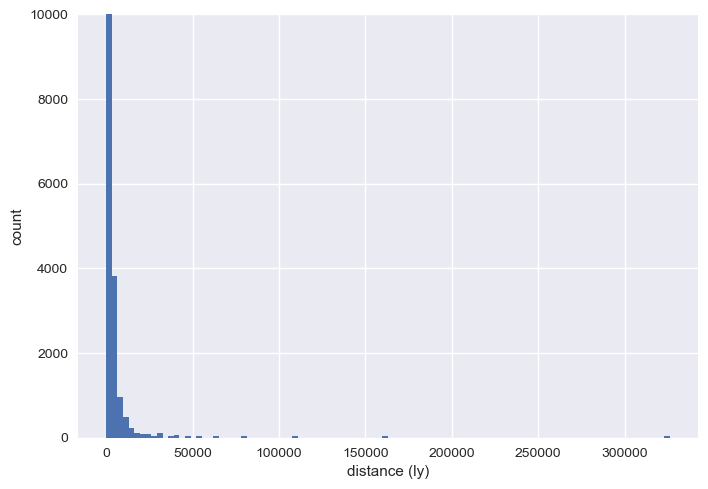

In [144]:
# create the histogram
n, bins, patches = plt.hist(data['distance'], bins=100)
plt.xlabel('distance (ly)')
plt.ylabel('count')
plt.ylim([0, 10000])
plt.show()

In [145]:
data.iloc[data['distance'].argmin()]

magnitude              1.101000e+01
parallax               2.145361e-04
proper motion alpha   -1.048789e-03
proper motion delta    2.133778e-04
error alpha            3.638889e-07
error delta            4.194444e-07
error parallax         6.722222e-07
error motion alpha     4.222222e-07
error motion delta     5.055556e-07
alpha                  2.174489e+02
delta                 -6.268135e+01
distance               4.223016e+00
Name: 70890, dtype: float64

Indeed, the closest star is Alpha Centauri, located at a distance of 4.22 lightyears (as expected).

## Visible Stars

The brightness of stars is measured in magnitudes. A magnitude is a number that describes how much brighter or dimmer a given object is with respect to an agreed upon reference. It is a logarithmic scale, and is set up such that a difference of 5 magnitudes corresponds to a factor of 100 in the brightness of the objects. Moreover, somewhat confusingly, brighter objects have a smaller magnitude. And so, in order to filter only the visible stars, all we need to do is to isolate those with a magnitude of around 6.5 and less. A magnitude of 6.5 is on the edge of being seen by a human eye under perfect conditions, and is thus chosen as the cutoff:

In [146]:
cutoff_magnitude = 6.5
visible_stars = data[data['magnitude'] < cutoff_magnitude]

visible_stars

,magnitude,parallax,proper motion alpha,proper motion delta,error alpha,error delta,error parallax,error motion alpha,error motion delta,alpha,delta,distance
index,,,,,,,,,,,,
25,6.28,3.816667e-06,0.000016,-3.017778e-05,2.444444e-07,2.250000e-07,2.722222e-07,2.027778e-07,1.888889e-07,0.079365,-44.290297,237.377165
34,6.43,3.530556e-06,0.000012,-1.485278e-05,1.694444e-07,1.194444e-07,2.055556e-07,1.777778e-07,1.194444e-07,0.099470,26.918238,256.613867
43,6.18,2.119444e-06,-0.000022,-6.686111e-06,1.166667e-07,1.250000e-07,1.666667e-07,1.555556e-07,1.361111e-07,0.129089,59.559738,427.465563
50,6.49,4.691667e-06,0.000015,-5.700000e-06,1.444444e-07,1.555556e-07,2.222222e-07,1.555556e-07,1.527778e-07,0.142871,-53.097663,193.106113
63,6.36,1.336111e-06,0.000005,6.111111e-08,1.138889e-07,1.194444e-07,1.972222e-07,1.194444e-07,1.222222e-07,0.181750,45.253333,678.079470
...,...,...,...,...,...,...,...,...,...,...,...,...
118243,4.88,5.944444e-07,0.000003,-1.413889e-06,1.500000e-07,1.583333e-07,2.083333e-07,1.583333e-07,1.527778e-07,359.752207,55.754941,1524.094509
118268,4.03,8.550000e-06,0.000041,-3.115556e-05,2.555556e-07,1.333333e-07,2.416667e-07,2.666667e-07,1.388889e-07,359.827510,6.863594,105.963686
118277,5.59,1.030556e-06,-0.000002,-1.661111e-06,1.944444e-07,1.000000e-07,2.250000e-07,2.805556e-07,1.166667e-07,359.866257,-29.485153,879.127291


We have 8785 entries in dataframe from visible stars. However, this dataset spans the entire night sky, half of which is obstructed by our planet at any given point in time. This means there are around **4400** visible stars on a good night.

Of course, if the observation conditions are worse, the number is smaller (often by order of magnitude in cities. On the other hand, we only considered stars the average magnitude of which is below the visibility limit. At any given point in time, there will be many variable stars which may be visible at maximum brightness despite being too dim to observe consistently throughout the year.

We can now plot a subset of the night sky. How about the rectangle of ascension between 10h and 14h, and declination between 40 and 70 degrees? Recognize the pattern of stars? (Big Dipper?)

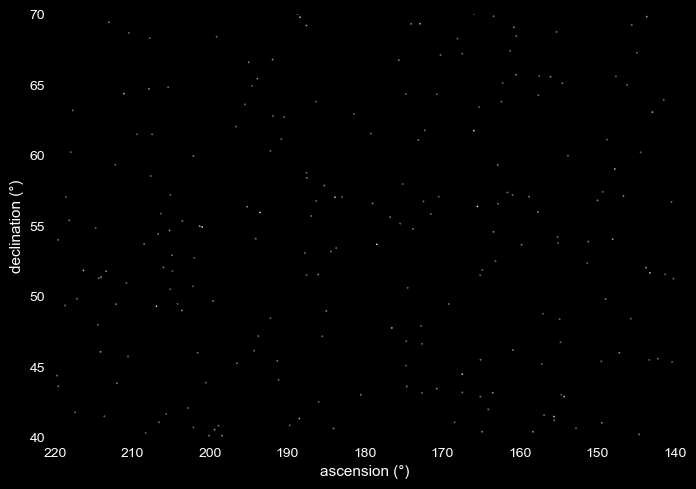

In [159]:
brightness = np.power(10, -(visible_stars['magnitude'] - visible_stars['magnitude'].min()) / 10)
brightness = (1 - brightness).to_numpy()

plt.scatter(visible_stars['alpha'], visible_stars['delta'], c=brightness, s=brightness * 5,
            cmap='Greys', marker='.', vmin=0.5, vmax=1.0)
plt.xlim([220, 140])
plt.ylim([40, 70])
plt.xlabel('ascension (°)')
plt.ylabel('declination (°)')
plt.grid(False)
plt.style.use(['dark_background'])
plt.show()